<a href="https://colab.research.google.com/github/ashutosh7856/collegeprojects/blob/main/testing_model1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies (if not already installed)
# !pip install pandas torch transformers datasets  # Uncomment if needed

# Import required libraries
import pandas as pd
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, DataCollatorForSeq2Seq
import re
from google.colab import files
from datasets import Dataset

# Upload the dataset manually
uploaded = files.upload()
file_name = next(iter(uploaded))  # Get the uploaded file name

# Load the dataset
df = pd.read_csv(file_name)

# Keep only relevant columns and rename them
df = df[['Ungrammatical Statement', 'Standard English']]
df.columns = ['incorrect', 'correct']

# Preprocessing: Convert text to lowercase and remove extra spaces in one step
df = df.apply(lambda x: x.str.lower().str.strip())

# Load T5 tokenizer and model
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Prepare data for training
def preprocess_function(examples):
    inputs = ["fix grammar: " + text for text in examples["incorrect"]]
    targets = examples["correct"]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length").input_ids
    model_inputs["labels"] = labels
    return model_inputs

# Convert pandas DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df)
tokenized_dataset = dataset.map(preprocess_function, batched=True)

# Set training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=500,
    save_total_limit=2,
)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Train the model
trainer.train()

# Save the fine-tuned model
model.save_pretrained("./t5_grammar_corrector")
tokenizer.save_pretrained("./t5_grammar_corrector")

# Preview the cleaned data
print(df.head())


**# Install dependencies (if not already installed)**

In [1]:
# Install dependencies (if not already installed)
!pip install pandas torch transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Import required libraries**

In [2]:
# Import required libraries
import pandas as pd
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, DataCollatorForSeq2Seq
import re
from google.colab import files
from datasets import Dataset

**# Upload the dataset manually**

In [3]:
# Upload the dataset manually
uploaded = files.upload()
file_name = next(iter(uploaded))  # Get the uploaded file name

Saving Grammar-Correction.csv to Grammar-Correction.csv


**# Load the dataset**

In [4]:
# Load the dataset
df = pd.read_csv(file_name)

**# Keep only relevant columns and rename them**

In [5]:
# Keep only relevant columns and rename them
df = df[['Ungrammatical Statement', 'Standard English']]
df.columns = ['incorrect', 'correct']

**# Preprocessing: Convert text to lowercase and remove extra spaces in one step**

In [6]:
# Preprocessing: Convert text to lowercase and remove extra spaces in one step
df = df.apply(lambda x: x.str.lower().str.strip())

**# Load T5 tokenizer and model**

In [14]:
# Load T5 tokenizer and model
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

In [8]:
def preprocess_function(examples):
    inputs = ["fix grammar: " + text for text in examples["incorrect"]]
    targets = examples["correct"]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length").input_ids
    model_inputs["labels"] = labels
    return model_inputs

**# Convert pandas DataFrame to Hugging Face Dataset**

In [9]:
# Convert pandas DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df)
tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2018 [00:00<?, ? examples/s]

**# Set training arguments**

In [15]:
# Set training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="no",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=500,
    save_total_limit=2,
)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

**# Initialize Trainer**

In [17]:
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

<ipython-input-17-a5774bdbbf5e>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


#Train the model

In [18]:
# Train the model
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sumitstha2060 (sumitstha2060-sharda-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
500,0.451700


TrainOutput(global_step=759, training_loss=0.3154536675715792, metrics={'train_runtime': 7586.8704, 'train_samples_per_second': 0.798, 'train_steps_per_second': 0.1, 'total_flos': 204839816527872.0, 'train_loss': 0.3154536675715792, 'epoch': 3.0})

**Save the fine-tuned model**

In [21]:
# Save the fine-tuned model
model.save_pretrained("./t5_grammar_corrector")
tokenizer.save_pretrained("./t5_grammar_corrector")

('./t5_grammar_corrector/tokenizer_config.json',
 './t5_grammar_corrector/special_tokens_map.json',
 './t5_grammar_corrector/spiece.model',
 './t5_grammar_corrector/added_tokens.json')

In [22]:
# Preview the cleaned data
print(df.head())

                             incorrect                               correct
0        i goes to the store everyday.           i go to the store everyday.
1  they was playing soccer last night.  they were playing soccer last night.
2     she have completed her homework.       she has completed her homework.
3            he don't know the answer.           he doesn't know the answer.
4            the sun rise in the east.            the sun rises in the east.


**Load the fine-tuned model**

In [23]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the fine-tuned model
model_path = "./t5_grammar_corrector"
tokenizer = T5Tokenizer.from_pretrained(model_path)
model = T5ForConditionalGeneration.from_pretrained(model_path)


##Testing examples

In [25]:
def correct_grammar(sentence):
    input_text = "fix grammar: " + sentence
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    output_ids = model.generate(input_ids, max_length=128, num_beams=5, early_stopping=True)
    corrected_sentence = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return corrected_sentence

# Test examples
sentences = [
    "he go to school every day.",
    "she don't like apple.",
    "we was playing football.",
    "i can speaks english.",
    "i am a boys",
]

for s in sentences:
    print(f"Incorrect: {s}")
    print(f"Corrected: {correct_grammar(s)}\n")


Incorrect: he go to school every day.
Corrected: he goes to school every day.

Incorrect: she don't like apple.
Corrected: she doesn't like apple.

Incorrect: we was playing football.
Corrected: we were playing football.

Incorrect: i can speaks english.
Corrected: i can speak english.

Incorrect: i am a boys
Corrected: i am a boy



#Evaluation

In [27]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.6 MB/s eta 0:00:00


**Installling packages like rouge_score**

In [29]:
!pip install rouge_score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=9846bc7d71200da8472a9e9e4397812926f6c3e7766f91361704b8c6b2d30693
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [34]:
!pip install rouge_score evaluate


In [38]:
!pip install evaluate datasets
import evaluate

# Import load_metric from the correct location
from evaluate import load

# Load the ROUGE metric
metric = load("rouge")

# Function to evaluate the model
def evaluate_model(dataset, num_samples=50):
    predictions, references = [], []

    for example in dataset.select(range(num_samples)):
        input_text = "fix grammar: " + example["incorrect"]
        input_ids = tokenizer.encode(input_text, return_tensors="pt")

        # Generate correction using the trained model
        output_ids = model.generate(input_ids, max_length=128, num_beams=5, early_stopping=True)
        corrected_sentence = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        predictions.append(corrected_sentence)
        references.append(example["correct"])

    # Compute ROUGE score
    results = metric.compute(predictions=predictions, references=references)
    return results

# Run evaluation
eval_results = evaluate_model(tokenized_dataset)
print(eval_results)

{'rouge1': 0.9372690283572636, 'rouge2': 0.8532230547230546, 'rougeL': 0.9368183222006752, 'rougeLsum': 0.9372106896371601}


**Score Visulaization**

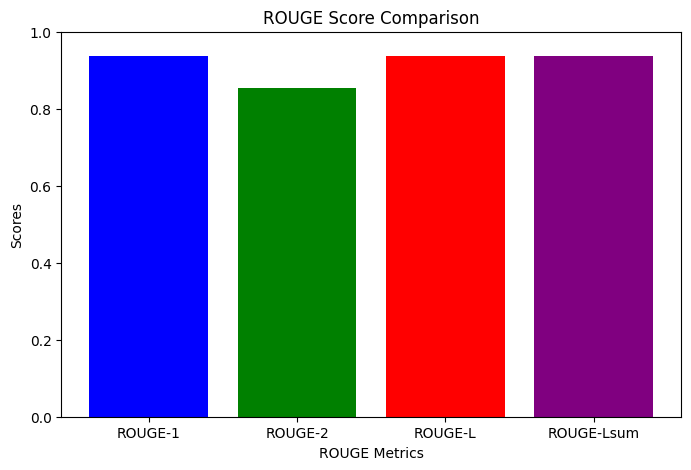

In [39]:
import matplotlib.pyplot as plt

# ROUGE scores from evaluation
rouge_scores = {
    "ROUGE-1": 0.9373,
    "ROUGE-2": 0.8532,
    "ROUGE-L": 0.9368,
    "ROUGE-Lsum": 0.9372
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(rouge_scores.keys(), rouge_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("ROUGE Metrics")
plt.ylabel("Scores")
plt.title("ROUGE Score Comparison")
plt.ylim(0, 1)  # Scores range between 0 and 1

# Show the graph
plt.show()


#GLUE score for my model

In [41]:
!pip install nltk


In [42]:
import nltk
from nltk.translate.gleu_score import corpus_gleu


In [43]:
predictions = []
references = []

for example in dataset.select(range(50)):  # Select a sample for evaluation
    input_text = "fix grammar: " + example["incorrect"]
    input_ids = tokenizer.encode(input_text, return_tensors="pt")

    # Generate the corrected sentence using your model
    output_ids = model.generate(input_ids, max_length=128, num_beams=5, early_stopping=True)
    corrected_sentence = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    predictions.append(corrected_sentence)
    references.append([example["correct"]])  # NLTK expects a list of reference lists


In [44]:
from nltk.translate.gleu_score import corpus_gleu

gleu_score = corpus_gleu(references, predictions)
print("GLEU Score:", gleu_score)


GLEU Score: 0.9360565819861432


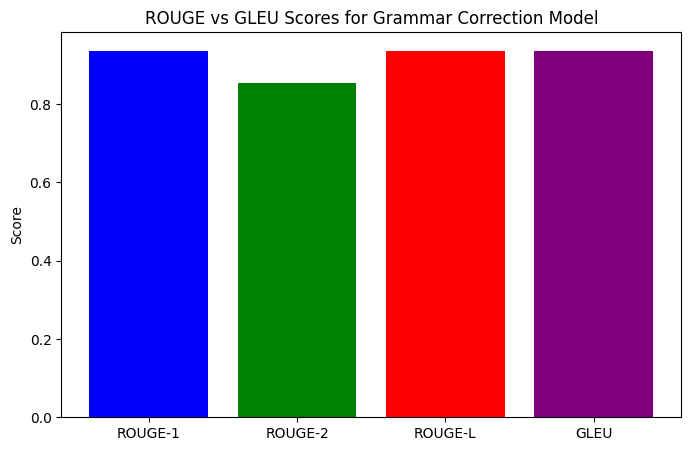

In [45]:
import matplotlib.pyplot as plt

scores = {"ROUGE-1": 0.937, "ROUGE-2": 0.853, "ROUGE-L": 0.936, "GLEU": gleu_score}

plt.figure(figsize=(8,5))
plt.bar(scores.keys(), scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Score")
plt.title("ROUGE vs GLEU Scores for Grammar Correction Model")
plt.show()
